In [15]:
# developed By - rajyavardhan bithale
# github - https://github.com/rajyavardhanbithale
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow,keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from PIL import ImageFile
from tensorflow.keras.callbacks import ModelCheckpoint
import warnings


In [23]:
# Ignore all warning messages
warnings.filterwarnings("ignore")

In [3]:
# {'downdog': 0, 'tree': 1, 'warrior1': 2}
basedir = "/kaggle/input/yoga-pose-classification/dataset"

path1_train = '/kaggle/input/yoga-pose-classification/dataset/yoga_set1/train/'
path1_test = '/kaggle/input/yoga-pose-classification/dataset/yoga_set1/test/'

class1 = ['downdog','tree','warrior1']

In [4]:
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [5]:
import os
from PIL import Image

def is_image_truncated(image_path):
    try:
        # Attempt to open the image
        img = Image.open(image_path)
        img.verify()  # Verify that the image is not truncated
        return False  # Image is not truncated
    except (IOError, SyntaxError) as e:
        # Image is truncated or corrupted
        return True

def remove_truncated_images(directory):
    for root, dirs, files in os.walk(directory):
        for filename in files:
            filepath = os.path.join(root, filename)
#             print(filepath)
            if is_image_truncated(filepath):
                print(f"Removing truncated image: {filepath}")
                os.remove(filepath)

# Specify the dataset directory
pose = ['downdog','tree','warrior1']
train_dataset_directory = '/kaggle/input/yoga-pose-classification/dataset/yoga_set1/train/'
test_dataset_directory = '/kaggle/input/yoga-pose-classification/dataset/yoga_set1/test/'

for p in pose:
    print(train_dataset_directory+p)
    print(test_dataset_directory+p)
    
    remove_truncated_images(train_dataset_directory+p)
    remove_truncated_images(test_dataset_directory+p)



/kaggle/input/yoga-pose-classification/dataset/yoga_set1/train/downdog
/kaggle/input/yoga-pose-classification/dataset/yoga_set1/test/downdog
/kaggle/input/yoga-pose-classification/dataset/yoga_set1/train/tree
/kaggle/input/yoga-pose-classification/dataset/yoga_set1/test/tree
/kaggle/input/yoga-pose-classification/dataset/yoga_set1/train/warrior1
/kaggle/input/yoga-pose-classification/dataset/yoga_set1/test/warrior1


In [6]:
def removeCorruptedImages(path):
    for filename in os.listdir(path):
        try:
            img = Image.open(os.path.join(path,filename))
            img.verify() 
        except (IOError, SyntaxError) as e:
            print('Bad file:', filename)
            os.remove(os.path.join(path,filename))
            

for class_image in class1:
    print(path1_train+class_image)
    removeCorruptedImages(path1_train+class_image)
    
for class_image in class1:
    removeCorruptedImages(path1_test+class_image)

/kaggle/input/yoga-pose-classification/dataset/yoga_set1/train/downdog
/kaggle/input/yoga-pose-classification/dataset/yoga_set1/train/tree
/kaggle/input/yoga-pose-classification/dataset/yoga_set1/train/warrior1


In [ ]:
read_file = cv2.imread('/kaggle/input/yoga-pose-classification/dataset/yoga_set1/train/tree/100.jpg')

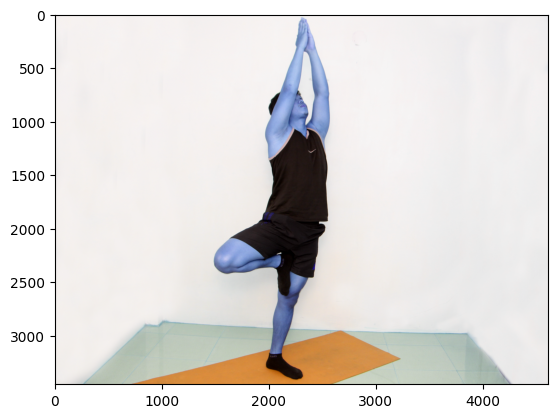

In [ ]:
%matplotlib inline
plt.imshow(read_file)

In [7]:
train = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test = ImageDataGenerator(rescale=1./255)

In [17]:
iamge_size = 250

In [18]:
train_datagen = train.flow_from_directory(
                  directory = path1_train,
                  target_size=(iamge_size,iamge_size),
                  batch_size=8,
                  shuffle=True,
                  color_mode="rgb",
                  class_mode='categorical'
)

test_datagen = test.flow_from_directory(
                  directory = path1_test,
                  target_size=(iamge_size,iamge_size),
                  batch_size=8,
                  shuffle=True,
                  color_mode="rgb",
                  class_mode='categorical'
)

Found 1184 images belonging to 3 classes.
Found 170 images belonging to 3 classes.


In [9]:
train_datagen.image_shape

(300, 300, 3)

In [25]:
model = keras.Sequential([
    # CNN
    layers.Conv2D(filters=32,kernel_size=(3,3),input_shape=(iamge_size,iamge_size,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(filters=64,kernel_size=(3,3),input_shape=(iamge_size,iamge_size,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(filters=128,kernel_size=(3,3),input_shape=(iamge_size,iamge_size,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    
    # Dense
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(32,activation='relu'),
    layers.Dense(3,activation='softmax'),
    
])

optimizers = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)
lo = tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2, from_logits=True)

model.compile(
    optimizer=optimizers,
    loss=lo,
    metrics=['accuracy']
)


In [26]:
checkpoint_filepath = 'model_checkpoint.weights.h5'
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath,
                                      save_weights_only=True,
                                      monitor='val_loss',
                                      mode='min',
                                      save_best_only=True)

if os.path.exists(checkpoint_filepath):
    model.load_weights(checkpoint_filepath)
    print("Checkpoint loaded successfully!")
    
model.fit(train_datagen,epochs=5,validation_data=test_datagen,callbacks=[checkpoint_callback])

Checkpoint loaded successfully!
Epoch 1/5
148/148 ━━━━━━━━━━━━━━━━━━━━ 35s 213ms/step - accuracy: 0.8892 - loss: 0.6500 - val_accuracy: 0.9529 - val_loss: 0.5735
Epoch 2/5
148/148 ━━━━━━━━━━━━━━━━━━━━ 33s 214ms/step - accuracy: 0.8864 - loss: 0.6522 - val_accuracy: 0.9294 - val_loss: 0.5866
Epoch 3/5
148/148 ━━━━━━━━━━━━━━━━━━━━ 32s 207ms/step - accuracy: 0.9053 - loss: 0.6290 - val_accuracy: 0.9647 - val_loss: 0.5542
Epoch 4/5
148/148 ━━━━━━━━━━━━━━━━━━━━ 32s 207ms/step - accuracy: 0.9212 - loss: 0.6191 - val_accuracy: 0.9529 - val_loss: 0.5732
Epoch 5/5
148/148 ━━━━━━━━━━━━━━━━━━━━ 34s 218ms/step - accuracy: 0.9216 - loss: 0.6134 - val_accuracy: 0.9471 - val_loss: 0.5816


In [27]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 248, 248, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 124, 124, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 122, 122, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 61, 61, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 59, 59, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 29, 29, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 107648)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 128)            │    13,779,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,765,512 (105.92 MB)

 Trainable params: 13,882,755 (52.96 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 13,882,757 (52.96 MB)

In [28]:
model.evaluate(test_datagen)

22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - accuracy: 0.9751 - loss: 0.5584


[0.5815648436546326, 0.9470587968826294]

In [31]:
model.predict(test_datagen)[:5]

22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step


array([[0.7453302 , 0.14033315, 0.11433667],
       [0.9697851 , 0.0196533 , 0.01056162],
       [0.97499883, 0.01464551, 0.0103556 ],
       [0.05069019, 0.898643  , 0.05066682],
       [0.0849302 , 0.47645298, 0.43861678]], dtype=float32)

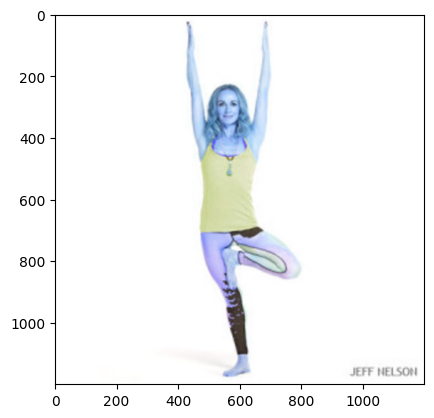

In [36]:
path = '/kaggle/input/yoga-pose-classification/dataset/yoga_set1/test/tree/22.jpg'
img = cv2.imread(path)
plt.imshow(img)

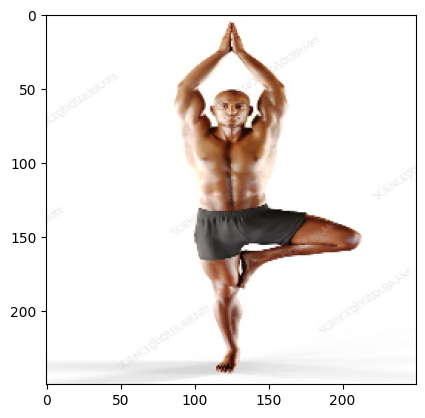

In [53]:
path = 'tree,jpg'
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_ref = cv2.resize(img,(250,250))

plt.imshow(img_ref)

In [46]:
img_ref.shape

(250, 250, 3)

In [52]:
import numpy as np
from keras.preprocessing import image
import matplotlib.image as mpimg

# predicting images
!wget https://media.sciencephoto.com/f0/33/03/15/f0330315-800px-wm.jpg -O tree,jpg
path = 'tree,jpg'

img = image.load_img(path, target_size=(250, 250))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

# images = np.vstack([x])
model.predict(x, batch_size=10)

--2024-05-05 13:40:33--  https://media.sciencephoto.com/f0/33/03/15/f0330315-800px-wm.jpg
Resolving media.sciencephoto.com (media.sciencephoto.com)... 65.8.49.34, 65.8.49.86, 65.8.49.16, ...
Connecting to media.sciencephoto.com (media.sciencephoto.com)|65.8.49.34|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36350 (35K) [image/jpeg]
Saving to: 'tree,jpg'

tree,jpg            100%[===================>]  35.50K  --.-KB/s    in 0.09s   

2024-05-05 13:40:33 (414 KB/s) - 'tree,jpg' saved [36350/36350]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([[0., 1., 0.]], dtype=float32)

In [56]:
model.export('ypset1')

Saved artifact at 'ypset1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 250, 250, 3), dtype=tf.float32, name='keras_tensor_84')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  133686165420720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133687301573264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133687301576784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133687301577136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133687301574320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133687301573968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133687301579072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133687301574144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133687301577840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133687301578192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133687301577664: Tens

In [64]:
# !pip install tensorflowjs
# !tensorflowjs_converter --input_format=tf_saved_model ypset1 tfypset1
!zip -r tfypset1.zip tfypset1 

  adding: tfypset1/ (stored 0%)
  adding: tfypset1/group1-shard4of14.bin (deflated 9%)
  adding: tfypset1/group1-shard14of14.bin (deflated 8%)
  adding: tfypset1/group1-shard11of14.bin (deflated 9%)
  adding: tfypset1/group1-shard9of14.bin (deflated 9%)
  adding: tfypset1/group1-shard1of14.bin (deflated 9%)
  adding: tfypset1/group1-shard12of14.bin (deflated 9%)
  adding: tfypset1/group1-shard10of14.bin (deflated 9%)
  adding: tfypset1/group1-shard7of14.bin (deflated 9%)
  adding: tfypset1/group1-shard3of14.bin (deflated 9%)
  adding: tfypset1/group1-shard2of14.bin (deflated 9%)
  adding: tfypset1/group1-shard8of14.bin (deflated 9%)
  adding: tfypset1/model.json (deflated 89%)
  adding: tfypset1/group1-shard5of14.bin (deflated 9%)
  adding: tfypset1/group1-shard13of14.bin (deflated 9%)
  adding: tfypset1/group1-shard6of14.bin (deflated 9%)
